In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
from tqdm import tqdm

from latin_squares import *

In [7]:
n_sim = 50
d_range = range(2, 4)
sim_results = [None] * len(d_range) * n_sim

for d in d_range:
    for sim in range(n_sim):
        verbose = False
        if sim == 0:
            if d == 2:
                print(f'Examples of iterations results\n')
                print('------------------------------\n')
            print(f'd = {d}\n')
            verbose = True
        kernel_steps = 300
        particle_number = int(2e5 / kernel_steps)
        smc = LatinSquareSMC(
                d=d,
                kernel_steps=kernel_steps,
                particle_number=particle_number,
                verbose = verbose
                )
        smc.run()
        logLt = smc.logLt
        num_latin = math.factorial(d)**d * np.exp(smc.logLt)
        sim_results[(d - d_range[0]) * n_sim + sim] = {'d': d, 'kernel_steps': kernel_steps, 
                                                       'N_particles': particle_number, 'logLt': logLt, 
                                                       'n_latin': num_latin}
        if sim == 0:
            print(f'\nEstimated number of latin matrices: {num_latin}\n')

Examples of iterations results

------------------------------

d = 2

---SMC started---
λ_max = 35.45506712678485

δ_0: 35.45506712678485
Iteration 0 done!
λ_0 : 35.45506712678485
---SMC finished---


Estimated number of latin matrices: 2.084084084084084

d = 3

---SMC started---
λ_max = 31.46608308022057

δ_0: 0.3373042131222894
Iteration 0 done!
λ_0 : 0.3373042131222894
Doing Metropolis Resampling...
Resampling done!
δ_1: 0.43308436391660177
Iteration 1 done!
λ_1 : 0.7703885770388912
Doing Metropolis Resampling...
Resampling done!
δ_2: 30.69569450318168
Iteration 2 done!
λ_2 : 31.46608308022057
---SMC finished---


Estimated number of latin matrices: 11.805550013233756



**Example for d = 4**

In [8]:
with open('sim_results.json', 'w') as file:
    json.dump(obj=sim_results, fp=file)

In [13]:
d = 4
kernel_steps = 1000
particle_number = int(2e5 / kernel_steps)
smc = LatinSquareSMC(d=4,
                     kernel_steps=kernel_steps,
                     particle_number=particle_number,
                     verbose = True
                     )
smc.run()
logLt = smc.logLt
num_latin = math.factorial(4)**4 * np.exp(smc.logLt)
print(f'\nEstimated log of the normalizing constant: {logLt}\n')
print(f"\nEstimated number of latin squares for d = {d}: {math.factorial(d)**d * np.exp(smc.logLt)}")

---SMC started---
λ_max = 24.129146166512953

δ_0: 0.24878035911626392
Iteration 0 done!
λ_0 : 0.24878035911626392
Doing Metropolis Resampling...
Resampling done!
δ_1: 0.30854070324760546
Iteration 1 done!
λ_1 : 0.5573210623638694
Doing Metropolis Resampling...
Resampling done!
δ_2: 0.3133930489275949
Iteration 2 done!
λ_2 : 0.8707141112914643
Doing Metropolis Resampling...
Resampling done!
δ_3: 23.25843205522149
Iteration 3 done!
λ_3 : 24.129146166512953
---SMC finished---


Estimated log of the normalizing constant: -6.351781863948482


Estimated number of latin matrices: 578.497055910827



In [2]:
with open('sim_results.json', 'r') as file:
    sim_results = json.load(file)

In [4]:
sim_results_df = pd.DataFrame(sim_results)

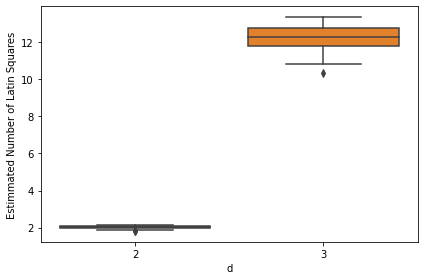

In [19]:
sns.boxplot(x='d', y='n_latin', data=sim_results_df)
plt.ylabel('Estimmated Number of Latin Squares')
plt.tight_layout()